<a href="https://colab.research.google.com/github/srikrishnapriyad/ml_diabetes_project/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline

data = pd.read_csv("diabetic_data.csv")

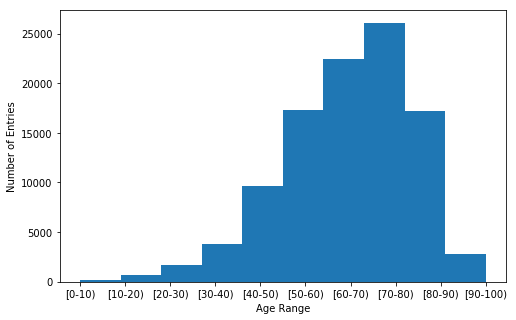

In [10]:
## Histogram of Ages
plt.figure(figsize=(8,5))
plt.hist(data["age"])
plt.ylabel("Number of Entries")
plt.xlabel("Age Range")
plt.legend()
plt.show();

# PCA

Re-mapped values
- Drugs [No:4, Steady:3, Down:2, Up:1]
- Gender [Male:0, Female:1]
- Race [?:0, AfricanAmerican:1, Asian:2, Caucasian:3, Hispanic:4, Other:5]
- Age [Map to lower bound 0-10 -> 0, 30-40 -> 30]
- Max_glu_serum [>200:200, >300:300, 

In [47]:
x = data.copy(deep=True)
drop_features = ['encounter_id', 'patient_nbr', 'weight', 
                 'payer_code', 'medical_specialty']

# Drop features to be ignored
x = x.drop(drop_features, axis=1)
# Store Target values
y = None

# Create encoder
encoder = preprocessing.LabelEncoder()

# Encode each feature
for feature in x.columns:
    if feature == "A1Cresult":
        #y = pd.DataFrame(encoder.fit_transform(x[feature]))
        y = x[feature]
        x.drop(feature, axis=1, inplace=True)
    else:
        x[feature] = encoder.fit_transform(x[feature])

In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

In [56]:
print(finalDf.head())

   principal component 1  principal component 2 A1Cresult
0             420.947170            -140.261582      None
1            -218.281415            -218.552717      None
2             445.586945             -31.605452      None
3             -47.890671             150.584654      None
4            -271.854807            -313.650155      None


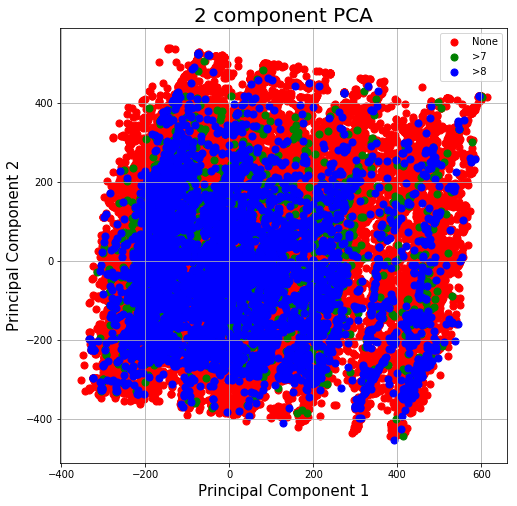

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(y.unique())
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['A1Cresult'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()